In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.metrics import mean_squared_error as mse

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


rng = check_random_state(12)
dataset = fetch_olivetti_faces()
X = dataset.images.reshape(dataset.images.shape[0], -1)  # == dataset.data

train = X[dataset.target < 30]
test = X[dataset.target >= 30]

n_faces = 3 
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = X.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]

# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]


# Models
nn_model = MLPRegressor(
        hidden_layer_sizes=(220,), 
        activation='relu', 
        solver='adam', 
        alpha=0.00002,
        batch_size='auto',
        learning_rate='constant', 
        learning_rate_init=0.00002,
        power_t=0.001,
        max_iter=750,
        shuffle=False, 
        random_state=3,
        tol=0.0001, 
        momentum=0.9, 
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=0.000000001,
).fit(X_train, y_train)
print('NN Error on train:', mse(y_train, nn_model.predict(X_train)))
print('NN Error on test:', mse(y_test, nn_model.predict(X_test)))
print()

knn_model = KNeighborsRegressor(
    n_neighbors=47,
    weights='uniform',
    algorithm='auto',
    leaf_size=100,
    p=2,
    metric='minkowski',
    n_jobs=-1,
).fit(X_train, y_train)
print('kNN Error on train:', mse(y_train, knn_model.predict(X_train)))
print('kNN Error on test:', mse(y_test, knn_model.predict(X_test)))
print()

dt_model = DecisionTreeRegressor(
    criterion='friedman_mse',
    splitter='best',
    max_depth=200,
    min_samples_split=10,
    min_samples_leaf=100,
    min_weight_fraction_leaf=0.01,
    max_features=200,
    random_state=6,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False,
).fit(X_train, y_train)
print('DT Error on train:', mse(y_train, dt_model.predict(X_train)))
print('DT Error on test:', mse(y_test, dt_model.predict(X_test)))
print()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/kondorm/scikit_learn_data
NN Error on train: 0.02160844706358737
NN Error on test: 0.01848749840340053

kNN Error on train: 0.0139188
kNN Error on test: 0.01346644

DT Error on train: 0.01833863750694508
DT Error on test: 0.015134715807781437



In [5]:
# Plotting
n_rows = 2
imshape = (64, 64,)

def test_model(y_pred, model_name):
    plt.figure(figsize=(3*n_faces, 5))
    plt.suptitle('Face completion with ' + model_name, size=12)
 
    # plot the true faces first
    for i in range(n_faces):
        plt.subplot(int( '{}{}{}'.format( n_rows, n_faces, i + 1 ) ))
        plt.axis('off')
        plt.imshow(np.hstack((X_test[i], y_test[i])).reshape(imshape), cmap=plt.cm.gray, interpolation='nearest')
        

    # then plot the predictions
    for i in range(n_faces):
        plt.subplot(int( '{}{}{}'.format( n_rows, n_faces, i + n_faces + 1 ) ))
        plt.axis('off')
        plt.imshow(np.hstack((X_test[i], y_pred[i])).reshape(imshape), cmap=plt.cm.gray, interpolation='nearest')

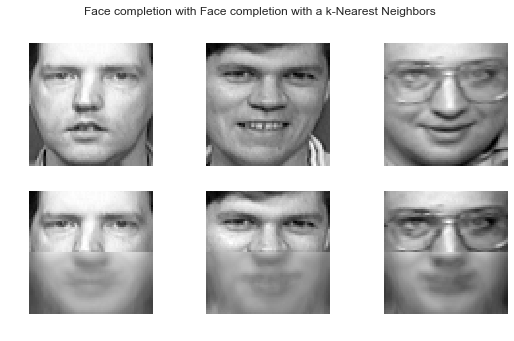

In [18]:
test_model(knn_model.predict(X_test), 'Face completion with a k-Nearest Neighbors')

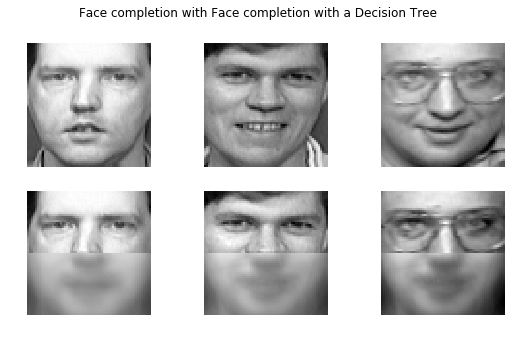

In [3]:
test_model(dt_model.predict(X_test), 'Face completion with a Decision Tree')

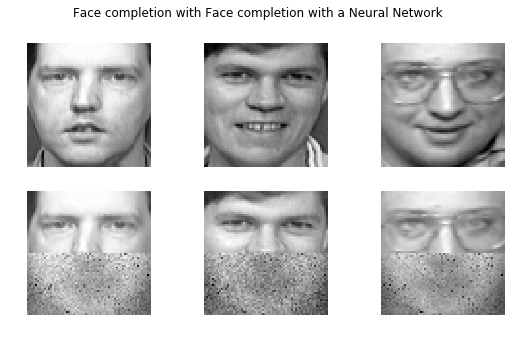

In [4]:
test_model(nn_model.predict(X_test), 'Face completion with a Neural Network')